In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as sio
from scipy.integrate import simps
from scipy import signal
from pylab import *
import pandas as pd
%matplotlib inline

### Loading the Data

In [2]:
mat = sio.loadmat('data\WLDataCW.mat')
datafile = 'data\WLDataCW.mat'
data_arr = sio.loadmat(datafile)
x_ = data_arr['data']

### Sample Data with Workload 'Low'

In [27]:
data1 = x_[0,:,0]
data1.shape

(512,)

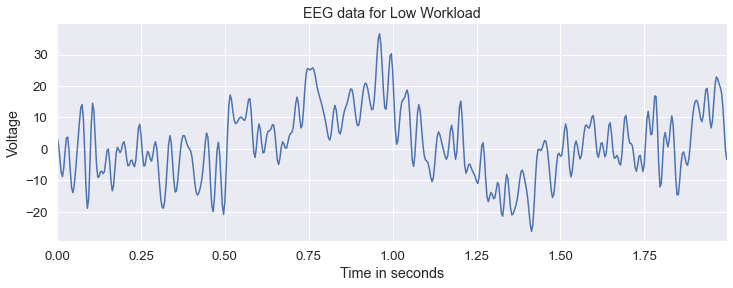

In [28]:

sns.set(font_scale=1.2)

# sampling frequency
sf = 256.
time = np.arange(data1.size) / sf


figure, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(time, data1, lw=1.5, color='b')
plt.xlabel('Time in seconds')
plt.ylabel('Voltage')
plt.xlim([time.min(), time.max()])
plt.title('EEG data for Low Workload')
sns.despine()
figure.savefig('./report/eeg_0.jpeg',pad_inches = 0.1,bbox_inches = 'tight')

### Sample Data with Workload 'Medium'

In [29]:
data2 = x_[0,:,180]
data2.shape

(512,)

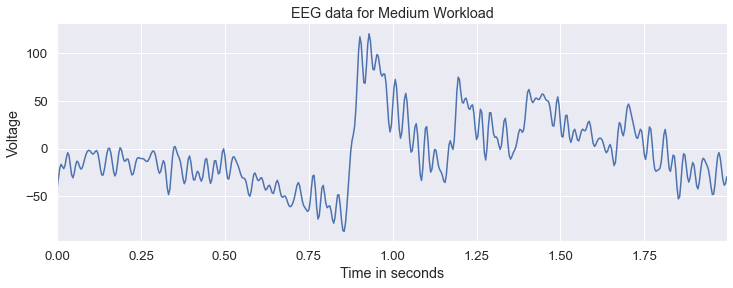

In [82]:

sns.set(font_scale=1.2)

# sampling frequency
sf = 256.
time = np.arange(data1.size) / sf


figure, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(time, data2, lw=1.5, color='b')
plt.xlabel('Time in seconds')
plt.ylabel('Voltage')
plt.xlim([time.min(), time.max()])
plt.title('EEG data for Medium Workload')
sns.despine()
figure.savefig('./report/eeg_1.jpeg',pad_inches = 0.1,bbox_inches = 'tight')

In [147]:
def plot_psd(psd,freq_vec):
    sns.set(font_scale=1.2, style='white')
    plt.figure(figsize=(8, 4))
    plt.plot(freq_vec, psd, color='g', lw=2)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power spectral density (V^2 / Hz)')
    plt.ylim([0, psd.max() * 1.1])
    plt.title("Welch's periodogram")
    plt.xlim([0, freq_vec.max()])
    sns.despine()
    return plt
    

In [135]:
def plot_psd_band(data,band_freq,freq_vec,psd):
    # Upper and Lower Band Frequency
    low, high = band_freq[0], band_freq[1]

    # Find intersecting values in frequency vector
    i_delta = np.logical_and(freq_vec >= low, freq_vec <= high)
    
    # Frequency resolution
    freq_res = freq_vec[1] - freq_vec[0]

    # The absolute power is approximated by calculating the are under the curve
    delta_power = simps(psd[i_delta], dx=freq_res)

    # Relative delta power (expressed as a percentage of total power)
    total_power = simps(psd, dx=freq_res)
    delta_rel_power = delta_power / total_power
    # Pyplot code to calculate the psd and fill the Band power range
    plt.figure(figsize=(8, 4))
    plt.plot(freq_vec, psd, lw=2, color='g')
    plt.fill_between(freq_vec, psd, where = i_delta, color='green')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power spectral density (uV^2 / Hz)')
    plt.xlim([0, 10])
    plt.ylim([0, psd.max() * 1.1])
    plt.title("Welch's periodogram")
    plt.text(x=3,y=35,s='Absolute Delta power: %.3f uV^2' % delta_power)
    plt.text(x=3,y=18,s='Relative Delta power: %.3f' % delta_rel_power)
    sns.despine()
    return plt

### Power spectral density for Workload 'Low'

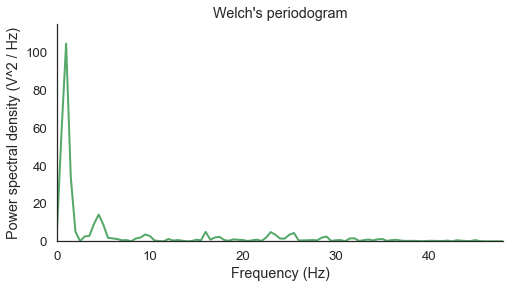

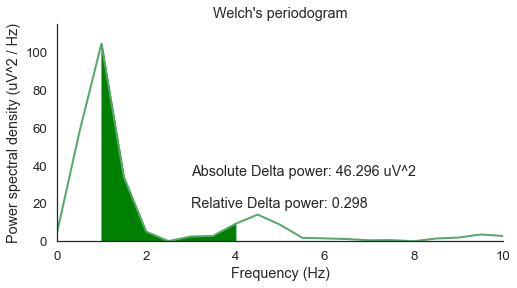

In [143]:
win = 4 * sf/2
freq_vec, psd = signal.welch(data1, sf, nperseg=win)
f = plot_psd(psd,freq_vec)
f.savefig('./report/psd_1.jpeg',pad_inches = 0.1,bbox_inches = 'tight')
f = plot_psd_band(data1,[1,4],freq_vec,psd)
f.savefig('./report/psd_delta_1.jpeg',pad_inches = 0.1,bbox_inches = 'tight')

### Power spectral density for Workload 'Medium'

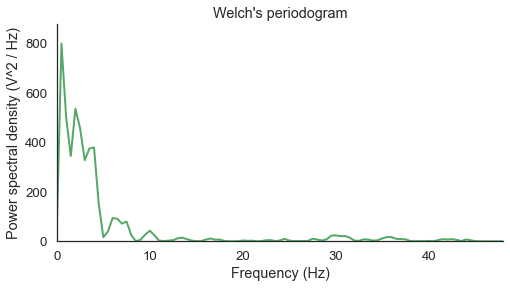

In [144]:
win = 4 * sf/2
freq_vec, psd = signal.welch(data2, sf, nperseg=win)
f = plot_psd(psd,freq_vec)
f.savefig('./report/psd_2.jpeg',pad_inches = 0.1,bbox_inches = 'tight')
# f = plot_psd_band(data2,[1,4],freq_vec,psd)
# f.savefig('./report/psd_delta_2.jpeg',pad_inches = 0.1,bbox_inches = 'tight')